# A1 Problems

### Problem 1

First we have four points:

$$f(x\pm \delta)$$ and $$f(x \pm 2\delta)$$

We want to figure out an estimate of the first derivative of $x$, $f'(x)$, should be.

Let's Taylor expand in the variable $\delta$ about the point $x$:

$$f(x\pm \delta) \approx f(x) \pm f'(x) \delta + \frac{1}{2} f''(x) \delta^2 \pm \frac{1}{6}f'''(x)\delta^3 + ...$$
$$f(x\pm 2\delta) \approx f(x) \pm 2 f'(x) \delta + 2 f''(x) \delta^2 \pm \frac{8}{6} f'''(x)\delta^3 + ...$$

Recall our goal is to recover $f'(x)$, and we know in theory the points $f(x\pm \delta)$ and $f(x \pm 2\delta)$. My strategy is to put a coefficient on each of these equations (I'll call them A, B, C, and D) and then solve for A, B, C, and D under the condition that the only remaining terms are the known points and the term with the first derivative. Putting this in action:

$$Af(x+\delta) + B f(x-\delta) + C f(x+2\delta) + D f(x-2\delta) = (A+B+C+D) f(x) + (A-B+2C-2D) f'(x) \delta + (A/2 + B/2 + 2C + 2D) f''(x)\delta^2 + (A/6 - B/6 + 8C/6 - 8D/6) f'''(x) \delta^3 + ... $$

We can solve for the coefficients using the conditions we set before:

$$A + B+ C +D = 0$$ $$A - B + 2C - 2D = 1$$ $$A/2 + B/2 + 2C + 2D = 0$$ $$A/6 - B/6 + 8C/6 - 8D/6 = 0$$

You can use matrix reduction/systems of equations to find:

$$A = 2/3 \quad B = -2/3 \quad C = -1/12 \quad D = 1/12$$

So we can plug these coefficients back into our taylor expansion above:

$$2/3(f(x + \delta) - f(x-\delta)) + 1/12 (f(x-2\delta) - f(x+2\delta)) = f'(x) \delta$$

And solve for $f'(x)$:

$$\implies f'(x) \approx \frac{2/3(f(x + \delta) - f(x-\delta)) + 1/12 (f(x-2\delta) - f(x+2\delta))}{\delta}$$

These are just the taylor expansions of our function like before (where $f$, $f'$, etc represent $f(x)$, $f'(x)$, etc) but with a new factor of $(1+g_i \epsilon)$ where $\epsilon$ is a small number accounting for the machine precision ($\sim 10^{-16}$ for doubles) and the $g_i$ are factors of order unity prescribing exactly how the machine decides to round the number.

Now we want to figure out the best choice of $\delta$ to get the most precise estimate given some function $f(x)$ and a value of $x$. Let's start by defining some new functions for brevity:

$$f(x+\delta) = f_+ = f + f'\delta + f''\delta^2/2 + f'''\delta^3/6 + ...$$
$$f(x-\delta) = f_- = f - f'\delta + f''\delta^2/2 - f'''\delta^3/6 + ...$$
$$f(x+2\delta) = f_{2+} = f + f'(2\delta) + f''(2\delta)^2/2 + f'''(2\delta)^3/6 + ...$$
$$f(x-2\delta) = f_{2-} = f - f'(2\delta) + f''(2\delta)^2/2 - f'''(2\delta)^3/6 + ...$$

Let's expand our representation of $f'(x)$, which we'll call $\tilde{f'}(x)$, using the Taylor series above. Rewriting first in terms of our new functions:

$$\tilde{f}'(x) = \frac{2/3(f_+ - f_-) + 1/12 (f_{2-} - f_{2+})}{\delta}$$

Notice that the even expansion terms in the above expression cancel out. Keeping up to leading order terms, we find:

$$\tilde{f}'(x) = f' - \frac{f^{(5)}(x)\delta^4}{30}$$

Thus, our expression for the derivative (keeping up to leading order terms) gives a *truncation error* of $\frac{f^{(5)}\delta^4}{30}$.

So, not yet accounting for machine precision effects, our error due to truncation alone for a given $x$ is:

$$E_t(\delta) = \left|f'(x) - \tilde{f}'(x)\right| = \left| \frac{f^{(5)}(x)\delta^4}{30} \right|$$

In order to account for machine precision ($\epsilon$, the 'worst' the machine can do at achieving the exact number we wanted), we will attach prefactors $\epsilon_i < \epsilon$ to each of the terms in our expression for $\tilde{f}'(x)$:

$$\tilde{f_\epsilon}'(x) = \frac{2/3((1+\epsilon_1)f_+ - (1+\epsilon_2)f_-) + 1/12 ((1+\epsilon_3)f_{2-} - (1+\epsilon_4)f_{2+})}{\delta}$$

Where we are representing our expression for the derivative *including* machine precision with $\tilde{f_\epsilon}(x)$

However, we have no way of knowing what $\epsilon_i$ will be exactly -- that's up to chance regarding how close the machine rounded value ends up being to the actual value. However, we can take the "worst case" scenario: the one in which we maximize the error due to machine precision. This is an acceptable approximation to make because we don't really care very much about pre-factors anyways, we just want to know the dependence of our error on $\delta$, and substituting the $\epsilon_i$ to create a "worst case" won't change that. So, coming up with an expression for our machine precision error:

$$E_m(\delta) = \left| \tilde{f_\epsilon}'(x) - \tilde{f}(x) \right| = \frac{2/3(\epsilon_1f_+ - \epsilon_2f_-) + 1/12 (\epsilon_3f_{2-} - \epsilon_4f_{2+})}{\delta}$$

To create the worst case, we'll maximize the error by setting $\epsilon_i = \pm \epsilon$ where the choice of plus or minus is made to maximize the value:

$$E_m(\delta) \leq \left| \frac{2/3(\epsilon f_+ + \epsilon f_-) + 1/12 (\epsilon f_{2-} + \epsilon f_{2+})}{\delta} \right|$$

(Note: here I'm assuming all the functions $f_\pm$ are positive, but note if they were negative, just choose the appropriate $\pm \epsilon$ to make the contribution as great as possible within the absolute value. Our next approximation will take care of this worry anyways)

In order to turn this expression into something we can actually evaluate, we must approximate $f_\pm$ and $f_{2\pm}$. In practice, since the values of $\delta$ are usually quite small, we can make the approximation $f_\pm = f(x\pm\delta) \approx f(x)$ and $f_{2\pm} = f(x\pm 2\delta) \approx f(x)$ in order to give us an expression we can evaluate. Making this approximation and collecting terms:

$$E_m (x) \leq \frac{3\epsilon}{2\delta} \left| f(x) \right|$$

So, with this approximation in hand, our expression for the total error is:

$$E(\delta) = E_t(\delta) + E_m(\delta) = \frac{\left|f^{(5)}(x)\right|\delta^4}{30} + \frac{3\epsilon}{2\delta} |f(x)| $$

To choose the optimal $\delta$ means to minimize the error we obtain. So, following standard minimization procedure:

$$\frac{dE}{d\delta} = \frac{2\left|f^{(5)}(x)\right| \delta^3}{15} - \frac{3\epsilon}{2\delta^2} |f(x)| = 0$$

Rearranging for delta:

$$\delta = \sqrt[5]{\frac{45\epsilon}{4} \left| \frac{f(x)}{f^{(5)}(x)}\right|}$$

Given $f_1(x) = e^x$ and $f_2(x) = e^{0.01x}$, we can evaluate $\delta$ for each of these and find:

$$\delta_1 = \sqrt[5]{\frac{45\epsilon}{4}}$$

$$\delta_2 = \sqrt[5]{\frac{45\epsilon}{4} \frac{1}{10^{-10}}}$$

(Note: in general, our choice of $\delta$ may depend on the point $x$, but because our functions in this case are exponentials, the dependency on $x$ goes away!)

Given $\epsilon \approx 10^{-16}$ for 64 bit and evaluating:

$$\delta_1 \approx 10^{-3}$$

$$\delta_2 \approx 10^{-1}$$

Let's make some simple plots of the error on our first derivative for various $\delta$ space logarithmically and see how well our estimation of ideal $\delta$ holds:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Our estimate for the derivative
def df_dx(f,x,delta):
    return ((2/3)*(f(x + delta) - f(x-delta)) + (1/12)*(f(x-2*delta) - f(x+2*delta)))/delta

# A function I create to use as f_2
def exp_fnc(x):
    return np.exp(0.01*x)

In [3]:
# Pick an arbitrary x
x = 1
# Make an array of delta values spaced logarithmically
delta = np.logspace(-10,0,300)

# f(x) = e^x; f'(x) = e^x
pred_1 = df_dx(np.exp, x, delta)
actual_1 = np.exp(x)
diff_1 = np.abs(pred_1 - actual_1)

# f(x) = e^(0.01*x); f'(x) = 0.01*e^(0.01*x)
pred_2 = df_dx(exp_fnc, x, delta)
actual_2 = 0.01*exp_fnc(x)
diff_2 = np.abs(pred_2 - actual_2)

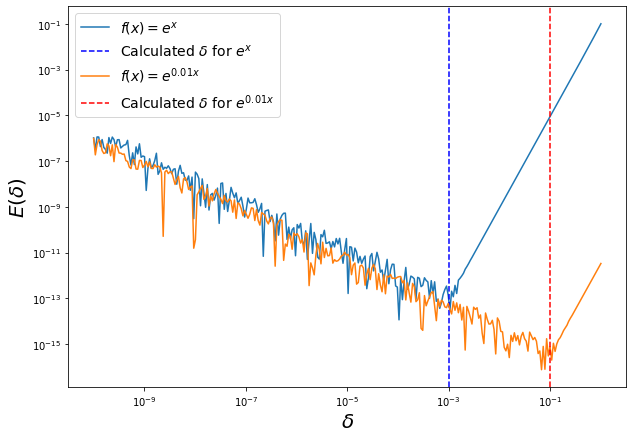

Minimum delta for f_1: 1.05e-04
Minimum delta for f_2: 6.75e-02


In [4]:
plt.figure(figsize=(10,7))
plt.loglog(delta,diff_1,label="$f(x) = e^x$")
plt.axvline(1e-3,c='b',ls='--',label="Calculated $\delta$ for $e^x$")
plt.loglog(delta,diff_2,label="$f(x) = e^{0.01x}$")
plt.axvline(1e-1,c='r',ls='--',label="Calculated $\delta$ for $e^{0.01x}$")
plt.ylabel("$E(\delta)$",fontsize=20)
plt.xlabel("$\delta$",fontsize=20)
plt.legend(fontsize=14)
plt.show()
print("Minimum delta for f_1: %.2e" % (delta[np.argmin(diff_1)]))
print("Minimum delta for f_2: %.2e" % (delta[np.argmin(diff_2)]))

We can clearly see the minimum of the error occurs arround our appropriate estimations of $\delta$, plus or minus a little bit due to how the $\epsilon_i$ ended up rounding in reality! If you were to smooth the function, the minima would lie closer to our true estimation: particularly for the blue curve, note the value near $10^{-4}$ is quite an outlier, and in reality the minimum looks to be around $10^{-3}$ if the function were smoothed.

### Problem 2

In [1]:
import numpy as np

# Calculate the two sided derivatve of func at x with step size dx 
def d(func, x, dx):
    return (func(x+dx) - func(x-dx))/(2*dx)

# Calculate the 3rd order derivative of func at x with step size dx
def d3(func,x,dx):
    return (-0.5*func(x-2*dx) + func(x-dx) - func(x+dx) + 0.5*func(x+2*dx))/(dx**3)

# Estimate the ideal step size for func at x from an initial guess dx0
# We essentially use dx0 to estimate the third derivative, and then
# plug that estimate into the formula for optimal dx.
# To be fancier, this could be made itterative.
def ideal_dx(func,x,dx0):
    third_deriv = d3(func,x,dx0)
    # Handling of numpy arrays since funky math here is the only thing
    # that isn't directly automatically extended by numpy
    if isinstance(x,np.ndarray):
        # Supress those pesky divide by zero errors since we handle those cases.
        with np.errstate(divide = 'ignore'):
            dx1 = np.cbrt(3*func(x)*1E-16/(d3(func,x,dx0)))
        dx1[np.where(np.isnan(dx1))] = dx0
        dx1[np.where(np.isinf(dx1))] = dx0
        return np.abs(dx1)
    else:
        if third_deriv == 0.0:
            return dx0
        dx1 = np.cbrt(3*func(x)*1E-16/(d3(func,x,dx0)))
        return np.abs(dx1)

def ndiff(fun , x, full=False):
    # Estimate ideal dx, we use 1E-3, as a starting guess for dx
    dx = ideal_dx(fun, x, 1E-3)
    # Calculated the derivative with given dx
    df = d(fun, x, dx)
    # Return if all we want is the derivative
    if not full:
        return df
    else: # Estimate error for full output
        error = np.abs(fun(x) * np.finfo(np.double).eps / dx + d3(fun,x,dx)*(dx**2))
    return df,dx,error

Let's run a quick test of this function and see how it performs.

In [11]:
x = np.array([0.1,1,10])
print(f"{x = }")
print("Function = x^2")
func = lambda x: np.power(x,2)
single_val = ndiff(func,1,True)
multi_val = ndiff(func,x, True)
print("Single Value:")
print(f"\tdf = {single_val[0]}\n\tdx = {single_val[1]}\n\terror = {single_val[2]}")
print("Multi Value")
print(f"\tdf = {multi_val[0]}\n\tdx = {multi_val[1]}\n\terror = {multi_val[2]}")

print("Function = exp(x)")
func = lambda x: np.exp(x)
single_val = ndiff(func,1,True)
multi_val = ndiff(func,x, True)
print("Single Value:")
print(f"\tdf = {single_val[0]}\n\tdx = {single_val[1]}\n\terror = {single_val[2]}")
print("Multi Value")
print(f"\tdf = {multi_val[0]}\n\tdx = {multi_val[1]}\n\terror = {multi_val[2]}")

x = array([ 0.1,  1. , 10. ])
Function = x^2
Single Value:
	df = 2.0000000000000018
	dx = 0.01
	error = 2.220446049250313e-14
Multi Value
	df = [ 0.2  2.  20. ]
	dx = [0.00952695 0.01       0.01      ]
	error = [1.42027091e-16 2.22044605e-14 2.22044605e-12]
Function = exp(x)
Single Value:
	df = 2.718281828449997
	dx = 6.69427371513674e-06
	error = 2.891796073184208e-10
Multi Value
	df = [1.10517092e+00 2.71828183e+00 2.20264658e+04]
	dx = [6.69427372e-06 6.69427372e-06 6.69427372e-06]
	error = [8.64117859e-11 2.89179607e-10 1.81749597e-06]


### Problem 3

For this problem, we want to interpolate temperature as a function of voltage. In the provided file `lakeshore.txt`, we are given $T$  (ordered from small to large) in the first column, $V$ in the second column, and $dT/dV$ in the third column. Let's start by loading in the data and taking a look at what we have.

In [5]:
# Load data
data = np.loadtxt("./lakeshore.txt")
# Variables for appropriate columns
T = data[:,0]
V = data[:,1]
dTdV = data[:,2]

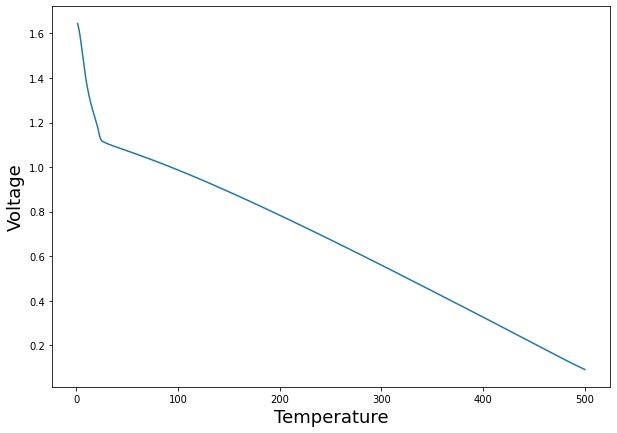

In [6]:
# Make a basic plot to see what the data looks like
plt.figure(figsize=(10,7))
plt.plot(T,V)
plt.xlabel("Temperature",fontsize=18)
plt.ylabel("Voltage",fontsize=18)
plt.show()

Alright, cool! Now to do an interpolation, recall we want to interpolate $T$ as a function of $V$. So, let's re-organize our data so that we have voltages ordered from smallests to largest with corresponding temperatures. Since this data is monotonic, that means we can just reverse the order of the data.

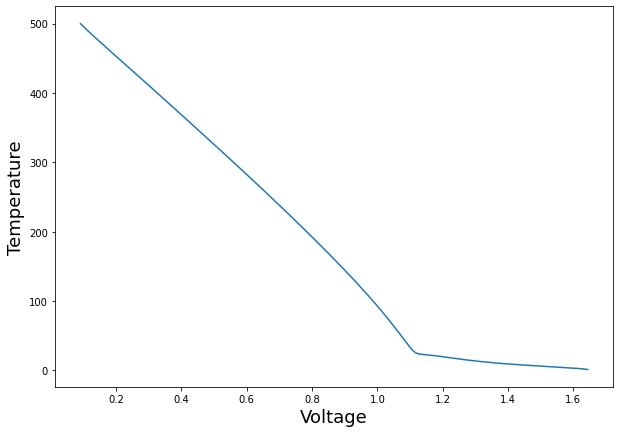

In [7]:
# Flip the data to do T as a function of V
T = np.flip(T)
V = np.flip(V)
dTdV = np.flip(dTdV)
# Another basic plot
plt.figure(figsize=(10,7))
plt.plot(V,T)
plt.xlabel("Voltage",fontsize=18)
plt.ylabel("Temperature",fontsize=18)
plt.show()

Great. Now, we can interpolate using `scipy`'s cubic spline interpolation as you've seen in class. This will give a function that interpolates $T$ given a $V$!

In [8]:
from scipy import interpolate

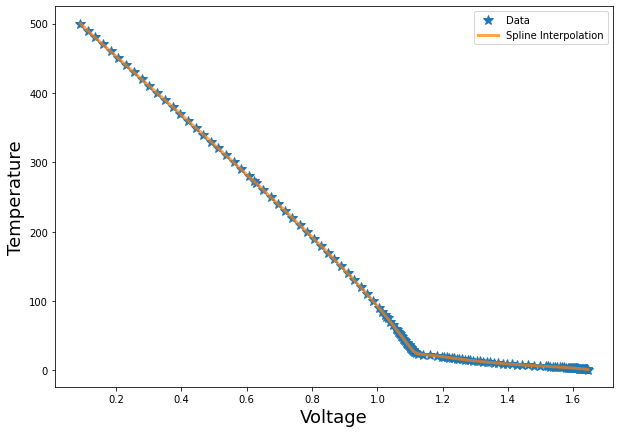

In [9]:
# Make the interpolation function
spline = interpolate.CubicSpline(V,T)
# Test out the interpolation
test_V = np.linspace(V.min(),V.max(),1000)
interpolated_T = spline(test_V)

# Make a plot of the data and the fit to see how it does
plt.figure(figsize=(10,7))
plt.plot(V,T,'*',label="Data",markersize=10)
plt.plot(test_V,interpolated_T,label="Spline Interpolation",lw=3,alpha=0.7)
plt.xlabel("Voltage",fontsize=18)
plt.ylabel("Temperature",fontsize=18)
plt.legend()
plt.show()

Fantastic, now we have a function `spline` which returns a $T$ given a $V$. Now to estimate the error on this fit, we will use the bootstrap method. This method characterizes error in a fit by resampling the data, and then refitting the spline interpolation. This way, we can see how our spline fit does at the points that are missing in our resample, and the difference between the fit and the value gives us an estimate of our error.

In [10]:
# I will choose to resample indices, so I can know which indices were not sampled
# and test the data at those indices against the spline fit
inds = np.arange(0, len(V))
# Now let's try resampling once
sample = np.sort(np.random.choice(inds, size=int(len(inds)/2), replace=False))
not_in_sample = inds[~np.isin(inds,sample)]
# Make the spline fit with the bootstrapped sample
spline_boot = interpolate.CubicSpline(V[sample],T[sample])
spline_boot_vals = spline_boot(V)

Now let's compare our spline fit with the bootstrapped sample to the data

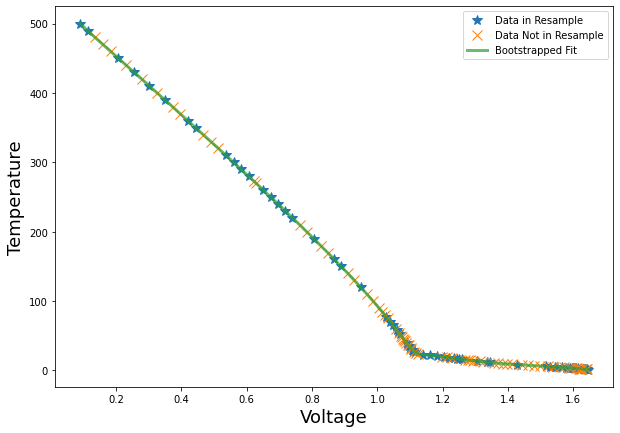

In [11]:
plt.figure(figsize=(10,7))
plt.plot(V[sample],T[sample],'*',label="Data in Resample",markersize=10)
plt.plot(V[not_in_sample],T[not_in_sample],'x',label="Data Not in Resample",markersize=10)
plt.plot(V,spline_boot_vals,label="Bootstrapped Fit",lw=3,alpha=0.7)
plt.xlabel("Voltage",fontsize=18)
plt.ylabel("Temperature",fontsize=18)
plt.legend()
plt.show()

Looks pretty similar, let's plot the error comparing our bootstrapped fit to the data not in the resample.

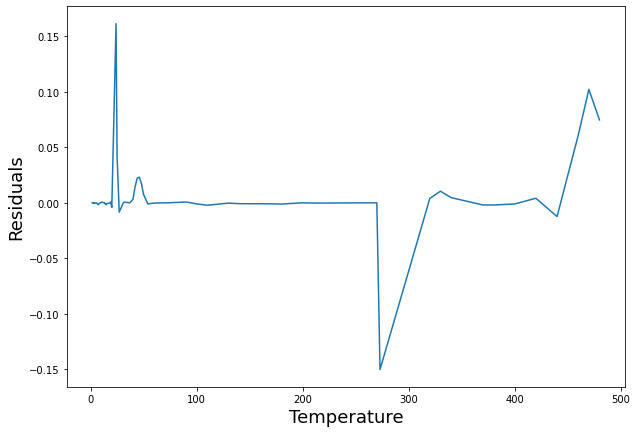

Average Error: 0.010520463039293246


In [12]:
plt.figure(figsize=(10,7))
resid = T[not_in_sample] - spline_boot_vals[not_in_sample]
plt.plot(T[not_in_sample], resid)
plt.ylabel("Residuals",fontsize=18)
plt.xlabel("Temperature",fontsize=18)
plt.show()
print("Average Error: {}".format(np.mean(np.abs(resid))))

Alright, so we have a rough average error for our fit! If we wanted to do an even better job, we could bootstrap resample many times, and make a distribution of values for each temperature interpolation, but since we only need a rough estimate for this problem we will stop here.

### Problem 4

In this problem, first we need to compar polynomial interpolation, cubic spline interpolation, and rational function interpolation for two functions:

$$cos(x), \quad x \in (-\pi / 2, \pi / 2)$$

$$\frac{1}{1 + x^2}, \quad x \in (-1, 1)$$

We'll follow the usual interpolation fitting methods we've seen in class. For the polynomial interpolation, I'll use a cubic polynomial here, as that can give a decent interpolation error while not suffering from the ringing of higher order polynomials. I'll use scipy's `CubicSpline` again for the spline interpolation.

In [13]:
def lorentzian(x):
    return 1 / (1+x**2)

In [14]:
def poly_interp(x, xi, yi, deg):
    """
    Construct a polynomial interpolator of degree "deg" (as seen in lecture)
    
    Note "x" are the set of test points you interpolate y for,
    whereas xi/yi are the points that you use to create the
    interpolation function
    """
    y_interp = np.zeros(len(x))
    for i in range(len(x)):    
        ind=np.max(np.where(x[i]>=xi)[0])
        x_use=xi[ind-1:ind+3]
        y_use=yi[ind-1:ind+3]
        pars=np.polyfit(x_use,y_use,deg)
        pred=np.polyval(pars,x[i])
        y_interp[i]=pred
    return y_interp

For the rational function interpolation, recall that we use two polynomials $p(x)$ and $q(x)$:

$$y(x) = \frac{p(x)}{q(x)} = \frac{p_0 + p_1 x + ... + p_n x^n}{1 + q_1 x + ... + q_m x^m}$$

Note we have set $q_0 = 1$ without loss of generality, since if $q_0$ were not $=1$ we could simply divide both $p$ and $q$ by $q_0$ and re-define the other coefficients.

We can rewrite this equation in matrix form:

$$Y = A P $$

$$Y = \begin{bmatrix}y_0 \\ y_1 \\ ... \\ y_{n+m-1}\end{bmatrix}, \quad P = \begin{bmatrix} p_0 \\ p_1 \\ ... \\ p_n \\ q_1 \\ ... \\ q_m \end{bmatrix}$$

Note $A$ is difficult to generalize in matrix form (since one must consider whether $n > m$ or vice versa), but is an $(n + m - 1) \times (n+m-1)$ matrix while $Y$ and $P$ are $(n+m-1) \times 1$ matrices. We can then get the coefficients for the rational functions by taking the matrix inverse:

$$P = A^{-1} Y$$

In [15]:
def rat_fit(x, y, n, m, print_coeffs=False):
    """
    The rational fitting method seen in class.
    
    Here, "x" and "y" are the set of points used to make the interpolation function,
    and "n" and "m" are the degree of polynomials p(x) and q(x)
    """
    assert(len(x)==n+m-1)
    assert(len(y)==len(x))
    mat=np.zeros([n+m-1,n+m-1])
    for i in range(n):
        mat[:,i]=x**i
    for i in range(1,m):
        mat[:,i-1+n]=-y*x**i
    pars=np.dot(np.linalg.inv(mat),y)
    p=pars[:n]
    q=pars[n:]
    
    if print_coeffs:
        print("Coefficients for the numerator p(x): {}".format(p))
        print("Coefficients for the denominator q(x): {}".format(q))
    return p,q

def rat_eval(p, q, x):
    """
    Use the rational function fit from rat_fit to interpolate for a set of "x"
    """
    top=0
    for i in range(len(p)):
        top=top+p[i]*x**i
    bot=1
    for i in range(len(q)):
        bot=bot+q[i]*x**(i+1)
    return top/bot

To compare polynomial, spline, and rational function interpolation, I'll write a function to produce interpolations, errors, and plots. I'll first compare for $n=m=3$, and then I'll compare for $n=4,\ m=5$ as asked in the problem statement. For the Lorentzian, we expect the rational function fit to correctly fit the function within machine precision, since the Lorentzian itself is a rational function.

In [16]:
def compare_interpolation(n, m):
    n_pt = n + m - 1
    cos_x = np.linspace(-np.pi/2, np.pi/2, n_pt)
    cos_y = np.cos(cos_x)
    lorentzian_x = np.linspace(-1, 1, n_pt)
    lorentzian_y = lorentzian(lorentzian_x)

    test_n_pt = 1001
    test_cos_x = np.linspace(-np.pi/2, np.pi/2, test_n_pt)
    test_lorentzian_x = np.linspace(-1, 1, test_n_pt)

    # For the polynomial fit, we need to exclude the first/last point
    test_poly_cos_x = np.linspace(cos_x[1], cos_x[-2], test_n_pt)
    test_poly_lorentzian_x = np.linspace(lorentzian_x[1], lorentzian_x[-2], test_n_pt)
    
    ### POLY COS ###
    poly_cos_y = poly_interp(test_poly_cos_x, cos_x, cos_y, 3)

    ### POLY LORENTZIAN ###
    poly_lorentzian_y = poly_interp(test_poly_lorentzian_x, lorentzian_x, lorentzian_y, 3)
    
    ### SPLINE COS ###
    spline_cos = interpolate.CubicSpline(cos_x, cos_y)
    spl_cos_y = spline_cos(test_cos_x)

    ### SPLINE LORENTZIAN ###
    spline_lorentzian = interpolate.CubicSpline(lorentzian_x, lorentzian_y)
    spl_lorentzian_y = spline_lorentzian(test_lorentzian_x)
    
    ### RAT COS ###
    p_cos, q_cos = rat_fit(cos_x, cos_y, n, m)
    rat_cos_y = rat_eval(p_cos, q_cos, test_cos_x)

    ### RAT LORENTZIAN ###
    p_lorentzian, q_lorentzian = rat_fit(lorentzian_x, lorentzian_y, n, m, print_coeffs=True)
    rat_lorentzian_y = rat_eval(p_lorentzian, q_lorentzian, test_lorentzian_x)
    
    ### COSINE RESIDUALS ###
    poly_cos_resid = np.cos(test_poly_cos_x) - poly_cos_y
    spl_cos_resid = np.cos(test_cos_x) - spl_cos_y
    rat_cos_resid = np.cos(test_cos_x) - rat_cos_y

    ### LORENTZIAN RESIDUALS ###
    poly_lorentzian_resid = lorentzian(test_poly_lorentzian_x) - poly_lorentzian_y
    spl_lorentzian_resid = lorentzian(test_lorentzian_x) - spl_lorentzian_y
    rat_lorentzian_resid = lorentzian(test_lorentzian_x) - rat_lorentzian_y
    
    fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10,8))

    ### PLOT FITS COS ###
    axs[0].plot(cos_x, cos_y, "*", c="k", label="True cos(x) points", markersize=10)
    axs[0].plot(test_poly_cos_x, poly_cos_y, label="Cubic polyfit")
    axs[0].plot(test_cos_x, spl_cos_y, label="Spline fit")
    axs[0].plot(test_cos_x, rat_cos_y, label="Rational function fit (n = %.0f, m = %.0f)" % (n,m))
    axs[0].set_ylabel("y", fontsize=18)
    axs[0].legend()

    ### PLOT RESIDUALS COS ###
    axs[1].plot(test_poly_cos_x, poly_cos_resid, label="Poly residuals, RMS = %.2e" % (np.std(poly_cos_resid)))
    axs[1].plot(test_cos_x, spl_cos_resid, label="Spline residuals, RMS = %.2e" % np.std(spl_cos_resid))
    axs[1].plot(test_cos_x, rat_cos_resid, label="Rational function residuals, RMS = %.2e" % (np.std(rat_cos_resid)))
    axs[1].set_ylabel("Residuals", fontsize=18)
    axs[1].set_xlabel("x", fontsize=18)
    axs[1].legend()
    plt.show()
    
    fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10,8))

    ### PLOT FITS LORENTZIAN ###
    axs[0].plot(lorentzian_x, lorentzian_y, "*", c="k", label="True lorentzian(x) points", markersize=10)
    axs[0].plot(test_poly_lorentzian_x, poly_lorentzian_y, label="Cubic polyfit")
    axs[0].plot(test_lorentzian_x, spline_lorentzian(test_lorentzian_x), label="Spline fit")
    axs[0].plot(test_lorentzian_x, rat_lorentzian_y, label="Rational function fit (n = %.0f, m = %.0f)" % (n,m))
    axs[0].set_ylabel("y", fontsize=18)
    axs[0].legend()

    ### PLOT RESIDUALS LORENTZIAN ###
    axs[1].plot(test_poly_lorentzian_x, poly_lorentzian_resid, label="Poly residuals, RMS = %.2e" % (np.std(poly_lorentzian_resid)))
    axs[1].plot(test_lorentzian_x, spl_lorentzian_resid, label="Spline residuals, RMS = %.2e" % np.std(spl_lorentzian_resid))
    axs[1].plot(test_lorentzian_x, rat_lorentzian_resid, label="Rational function residuals, RMS = %.2e" % (np.std(rat_lorentzian_resid)))
    axs[1].set_ylabel("Residuals", fontsize=18)
    axs[1].set_xlabel("x", fontsize=18)
    axs[1].legend()
    plt.show()

<ipython-input-16-0714473dd772>:17: RankWarning: Polyfit may be poorly conditioned
  poly_cos_y = poly_interp(test_poly_cos_x, cos_x, cos_y, 3)
<ipython-input-16-0714473dd772>:20: RankWarning: Polyfit may be poorly conditioned
  poly_lorentzian_y = poly_interp(test_poly_lorentzian_x, lorentzian_x, lorentzian_y, 3)


Coefficients for the numerator p(x): [ 1.00000000e+00 -3.33066907e-16  5.55111512e-16]
Coefficients for the denominator q(x): [-7.77156117e-16  1.00000000e+00]


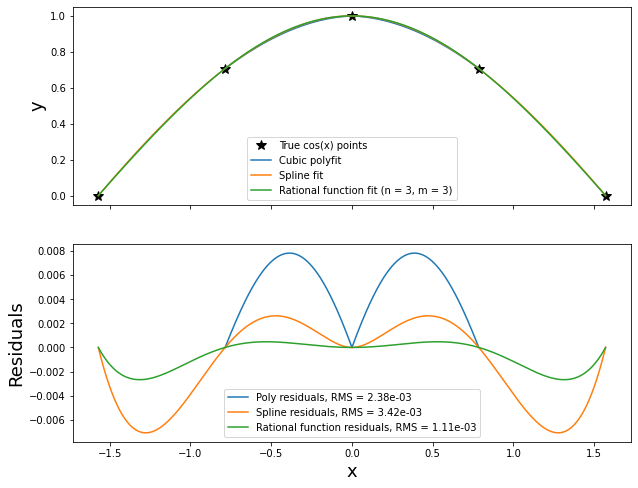

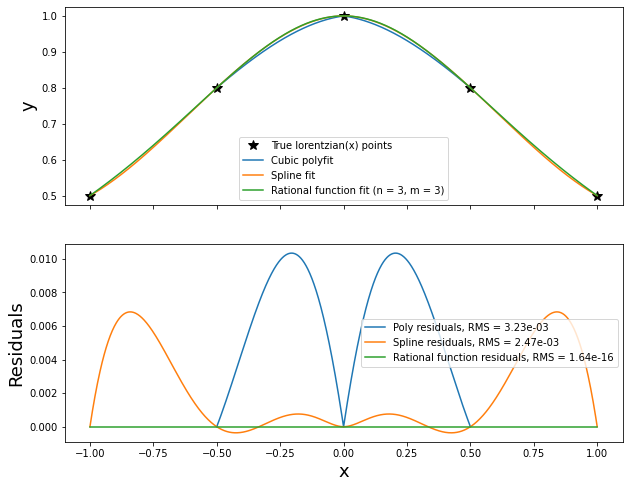

In [17]:
compare_interpolation(3,3)

We can see that the Lorentzian is described ~perfectly with the rational function fit, as the coefficients pop out as $p_0 = 1$ and $q_1 = 1$ as expected. Now let's try with n=4, m=5:

<ipython-input-16-0714473dd772>:17: RankWarning: Polyfit may be poorly conditioned
  poly_cos_y = poly_interp(test_poly_cos_x, cos_x, cos_y, 3)
<ipython-input-16-0714473dd772>:20: RankWarning: Polyfit may be poorly conditioned
  poly_lorentzian_y = poly_interp(test_poly_lorentzian_x, lorentzian_x, lorentzian_y, 3)


Coefficients for the numerator p(x): [-5.94790308  0.          0.          1.22859698]
Coefficients for the denominator q(x): [0. 0. 0. 0.]


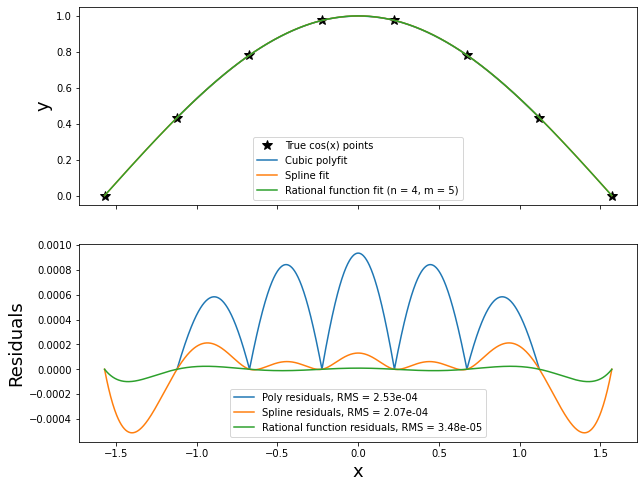

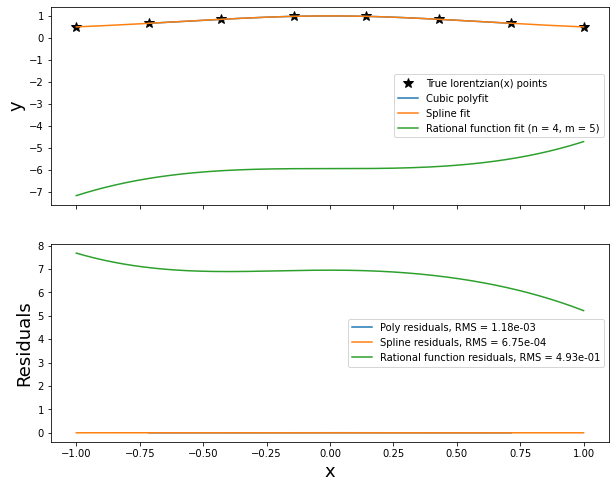

In [18]:
compare_interpolation(4,5)

The rational function interpolation for the Lorentzian does not work for these $n$ and $m$. This is because the matrix $A$ has become non-invertable. We can resolve this issue by calculating the [Moore-Penrose inverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse) of the matrix using `np.linalg.pinv`, which is defined even if $A$ is not invertable.

In [19]:
def rat_fit(x, y, n, m, print_coeffs=False):
    """
    The rational fitting method seen in class.
    
    Here, "x" and "y" are the set of points used to make the interpolation function,
    and "n" and "m" are the degree of polynomials p(x) and q(x)
    """
    assert(len(x)==n+m-1)
    assert(len(y)==len(x))
    mat=np.zeros([n+m-1,n+m-1])
    for i in range(n):
        mat[:,i]=x**i
    for i in range(1,m):
        mat[:,i-1+n]=-y*x**i
    pars=np.dot(np.linalg.pinv(mat),y)
    p=pars[:n]
    q=pars[n:]
    
    if print_coeffs:
        print("Coefficients for the numerator p(x): {}".format(p))
        print("Coefficients for the denominator q(x): {}".format(q))
    return p,q

<ipython-input-16-0714473dd772>:17: RankWarning: Polyfit may be poorly conditioned
  poly_cos_y = poly_interp(test_poly_cos_x, cos_x, cos_y, 3)
<ipython-input-16-0714473dd772>:20: RankWarning: Polyfit may be poorly conditioned
  poly_lorentzian_y = poly_interp(test_poly_lorentzian_x, lorentzian_x, lorentzian_y, 3)


Coefficients for the numerator p(x): [ 1.00000000e+00  3.99680289e-15 -3.33333333e-01 -5.32907052e-15]
Coefficients for the denominator q(x): [ 5.32907052e-15  6.66666667e-01 -8.88178420e-15 -3.33333333e-01]


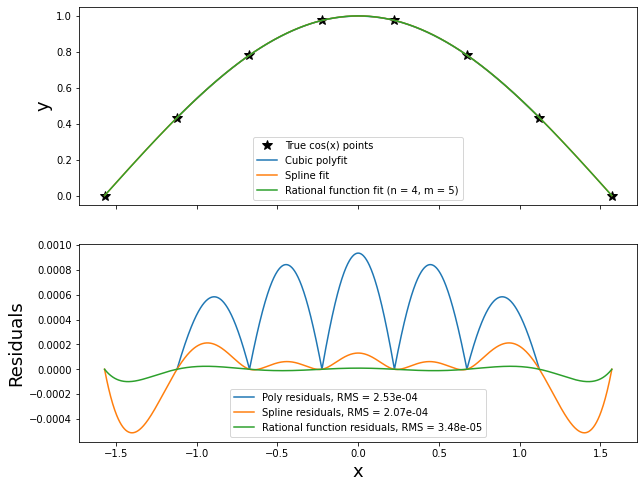

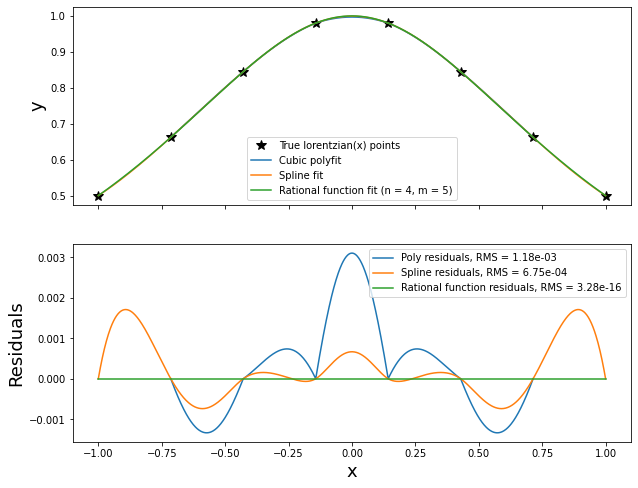

In [20]:
compare_interpolation(4,5)

Now things work as expected once more!